In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.replace(0,np.NaN)

,Name,Sex,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,...,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,Tested,Date
0,Abbie Murphy,F,Wraps,29.0,24-34,59.8,63,80.0,92.5,105.0,...,130.0,NaN,130.0,290.0,4,324.16,324.16,286.42,NaN,2019-04-06
1,Abbie Tuong,F,Wraps,29.0,24-34,58.5,63,100.0,110.0,120.0,...,145.0,NaN,145.0,332.5,2,378.07,378.07,334.16,NaN,2019-04-06
2,Ainslee Hooper,F,Raw,40.0,40-44,55.4,57,NaN,NaN,NaN,...,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,NaN,2019-04-06
3,Amy Moldenhauer,F,Wraps,23.0,20-23,60.0,63,NaN,NaN,105.0,...,NaN,NaN,132.5,310.0,3,345.61,345.61,305.37,NaN,2019-04-06
4,Andrea Rowan,F,Wraps,45.0,45-49,104.0,84+,120.0,130.0,140.0,...,170.0,NaN,170.0,390.0,3,321.25,338.91,274.56,NaN,2019-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647654,Marian Cafalik,M,Raw,60.5,60-64,73.5,74,160.0,170.0,175.0,...,NaN,NaN,190.0,452.5,4,327.07,438.27,316.52,Yes,2011-10-15
647655,Marian Piwowarczyk,M,Raw,55.5,55-59,63.5,66,90.0,100.0,110.0,...,170.0,NaN,170.0,375.0,5,304.16,372.60,295.66,Yes,2011-10-15
647656,Andrzej Bryniarski,M,Raw,62.5,60-64,94.4,105,140.0,150.0,160.0,...,180.0,NaN,180.0,440.0,6,274.48,382.36,264.22,Yes,2011-10-15
647657,Stanisław Goroczko,M,Raw,63.5,60-64,80.8,83,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,DQ,NaN,NaN,NaN,Yes,2011-10-15


In [3]:
# Mean Best Lift(Kg) per Category by Sex
group_sex = df[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']].groupby(df['Sex'])
group_sex.mean()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
Sex,,,
F,87.658709,65.959644,110.268720
M,134.478423,138.354186,158.602909


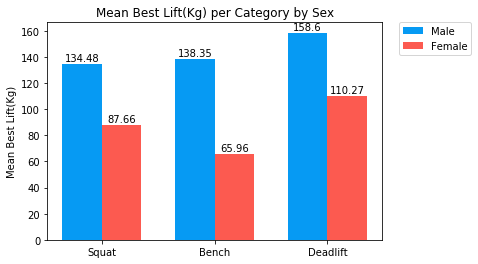

In [7]:
labels = ['Squat','Bench','Deadlift']
f_means = [87.66,65.96,110.27]
m_means = [134.48,138.35,158.60]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, m_means, width, label='Male',color='xkcd:azure')
bars2 = ax.bar(x + width/2, f_means, width, label='Female',color='xkcd:coral')

ax.set_ylabel('Mean Best Lift(Kg)')
ax.set_title('Mean Best Lift(Kg) per Category by Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,1),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

In [8]:
# Mean Best Lift(Kg) per Category by Weight Class and Sex
group_sex_weight = df[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']].groupby([df['Sex'],df['WeightClassKg']])
group_sex_weight.mean()

Best3SquatKg  Best3BenchKg  Best3DeadliftKg
Sex WeightClassKg                                             
F   43                52.056508     45.651582        67.299706
    47                71.536155     55.741420        86.371302
    52                75.700351     57.765904        93.084533
    57                78.180731     59.583214        99.067174
    63                84.002262     62.545483       106.571457
    72                89.641309     66.278271       113.977691
    84                96.828613     72.452428       121.531690
    84+              100.822403     77.296136       125.458722
M   105              139.643007    145.768955       166.213232
    120              144.605290    159.676083       167.718139
    120+             157.168537    174.668237       173.072932
    53                97.386266     94.153818       105.555087
    59                99.369142    102.270204       114.917793
    66               107.342759    105.802803       129.123482
    74               117.674189    114.137259       142.583503
    83               129.097739    124.585217       155.531911
    93               135.065107    134.446319       161.756630

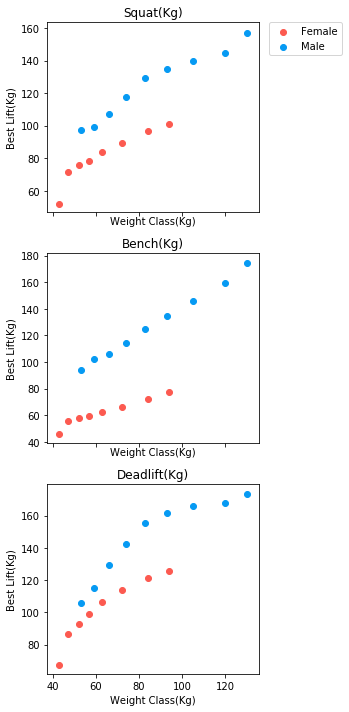

In [6]:
f_class = [43,47,52,57,63,72,84,94]
f_squat = [52.06,71.54,75.70,78.18,84.00,89.64,96.83,100.82]
f_bench = [45.65,55.74,57.77,59.58,62.55,66.28,72.45,77.30]
f_deadlift = [67.30,86.37,93.08,99.07,106.57,113.98,121.53,125.46]
m_class = [53,59,66,74,83,93,105,120,130]
m_squat = [97.39,99.37,107.34,117.67,129.10,135.07,139.64,144.61,157.17]
m_bench = [94.15,102.27,105.80,114.14,124.59,134.45,145.77,159.68,174.67]
m_deadlift = [105.56,114.92,129.12,142.58,155.53,161.76,166.21,167.72,173.07]

f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(5,10), sharex=True)

ax1.set_title('Squat(Kg)')
ax1.scatter(f_class,f_squat,color='xkcd:coral', label='Female')
ax1.scatter(m_class,m_squat,color='xkcd:azure', label='Male')
ax1.set_xlabel('Weight Class(Kg)')
ax1.set_ylabel('Mean Best Lift(Kg)')
ax1.legend(bbox_to_anchor=(1.05,1),loc=0,borderaxespad=0)

ax2.set_title('Bench(Kg)')
ax2.scatter(f_class,f_bench,color='xkcd:coral', label='Female')
ax2.scatter(m_class,m_bench,color='xkcd:azure', label='Male')
ax2.set_xlabel('Weight Class(Kg)')
ax2.set_ylabel('Mean Best Lift(Kg)')

ax3.set_title('Deadlift(Kg)')
ax3.scatter(f_class,f_deadlift,color='xkcd:coral', label='Female')
ax3.scatter(m_class,m_deadlift,color='xkcd:azure', label='Male')
ax3.set_xlabel('Weight Class(Kg)')
ax3.set_ylabel('Mean Best Lift(Kg)')

plt.tight_layout()